In [58]:
# algebra
import numpy as np

# dataframes
import pandas as pd

# EDA & visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# log
import math

# spliting and optimizing models
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score

# linear model
from sklearn.linear_model import (
    LogisticRegression,
    SGDClassifier,
    Lasso,
    Ridge,
    ElasticNet,
)

# Trees
from sklearn.tree import plot_tree, DecisionTreeClassifier, ExtraTreeClassifier


# Ensembles
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    VotingClassifier,
)

# SVMs
from sklearn.svm import SVC

# Feature preprocessing
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    RobustScaler,
    FunctionTransformer,
    OrdinalEncoder,
    OneHotEncoder,
)

# Model scoring
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    accuracy_score,
    confusion_matrix,
    classification_report,
)
import warnings

# model pipelining
from sklearn.pipeline import Pipeline

# Selection
from sklearn.feature_selection import (
    chi2,
    VarianceThreshold,
    f_classif,
    SelectKBest,
    SelectPercentile,
    SequentialFeatureSelector,
)
from sklearn.compose import ColumnTransformer


from xgboost import XGBClassifier
from catboost import CatBoostClassifier, Pool

pd.options.display.max_columns = None
warnings.filterwarnings("ignore")

In [59]:
bank_df_train = pd.read_csv(
    r"/home/ahmed/Ai/Kaggle-Competitions-Notebooks/Binary Classification with a Bank Churn Dataset/dataset/train.csv"
)
bank_df_test = pd.read_csv(
    r"/home/ahmed/Ai/Kaggle-Competitions-Notebooks/Binary Classification with a Bank Churn Dataset/dataset/test.csv",
)

ids = bank_df_test["id"]
bank_df_test.drop(columns=["id"], axis=1, inplace=True)
combine = [bank_df_test, bank_df_train]

In [60]:
mapper = {
    "CustomerId": "customer_id",
    "Surname": "name",
    "Geography": "country",
    "Gender": "gender",
    "Age": "age",
    "CreditScore": "score",
    "Tenure": "number_of_years",
    "Balance": "balance",
    "NumOfProducts": "used_products",
    "HasCrCard": "has_card",
    "IsActiveMember": "activeness",
    "EstimatedSalary": "salary",
    "Exited": "target",
}

for dataset in combine:
    dataset.rename(columns=mapper, inplace=True)

In [61]:
bank_df_test

,customer_id,name,score,country,gender,age,number_of_years,balance,used_products,has_card,activeness,salary
0,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...,...
110018,15662091,P'eng,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,15774133,Cox,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,15728456,Ch'iu,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38
110021,15687541,Yegorova,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58


In [62]:
bank_df_train

,id,customer_id,name,score,country,gender,age,number_of_years,balance,used_products,has_card,activeness,salary,target
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


# [1.0 Preprocessing](1.0)


- [1.1 Handling Missing values](#1.1)


In [63]:
for feature in bank_df_train.columns:
    if bank_df_train[feature].isnull().sum() > 0:
        print(feature)

In [64]:
for feature in bank_df_test.columns:
    if bank_df_test[feature].isnull().sum() > 0:
        print(feature)

There is no null values


[1.2 Handling Outlies](#1.2)


In [65]:
def get_outliers(feature):
    Q1 = bank_df_train[feature].quantile(0.25)
    Q2 = bank_df_train[feature].quantile(0.75)
    iqr = Q2 - Q1
    lower_limit = Q1 - 1.5 * iqr
    upper_limit = Q2 + 1.5 * iqr
    IQR_df = bank_df_train[
        (bank_df_train[feature] < lower_limit) | (bank_df_train[feature] > upper_limit)
    ]
    return (len(IQR_df)), lower_limit, upper_limit

In [66]:
for feature in bank_df_train.columns:
    if (
        bank_df_train[feature].dtype == "O"
        or feature == "target"
        or len(bank_df_train[feature].value_counts()) < 11
    ):
        continue
    outs, low, uper = get_outliers(feature)
    if outs:
        bank_df_train = bank_df_train[
            (bank_df_train[feature] >= low) & (bank_df_train[feature] <= uper)
        ]

[1.3 Dublicated rows](#1.3)


In [67]:
Dublicated_rows_train = bank_df_train[bank_df_train.duplicated()]
Dublicated_rows_test = bank_df_test[bank_df_test.duplicated()]
len(Dublicated_rows_train), len(Dublicated_rows_test)

(0, 0)

There is no Dublicated rows


[1.4 Dublicated columns](#1.4)


In [68]:
def get_duplicate_columns(df=pd.DataFrame):

    duplicate_columns = {}
    seen_columns = {}

    for column in df.columns:
        current_column = df[column]
        try:
            current_column_hash = current_column.values.tobytes()
        except AttributeError:
            current_column_hash = current_column.to_string().encode()

        if current_column_hash in seen_columns:
            if seen_columns[current_column_hash] in duplicate_columns:
                duplicate_columns[seen_columns[current_column_hash]].append(column)
            else:
                duplicate_columns[seen_columns[current_column_hash]] = [column]
        else:
            seen_columns[current_column_hash] = column

    return duplicate_columns


duplicate_columns_train = get_duplicate_columns(bank_df_train)
duplicate_columns_test = get_duplicate_columns(bank_df_test)

duplicate_columns_train, duplicate_columns_test

({}, {})

There is no Dublicated columns


[1.5 unneeded columns](#1.5)


In [69]:
bank_df_test.drop(columns=["name", "customer_id"], axis="columns", inplace=True)
bank_df_train.drop(columns=["name", "customer_id", "id"], axis="columns", inplace=True)
combine = [bank_df_test, bank_df_train]

# [3.0 Feature constuction](#3.0)


In [70]:
bank_df_train

,score,country,gender,age,number_of_years,balance,used_products,has_card,activeness,salary,target
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...
165029,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [71]:
bank_df_test

,score,country,gender,age,number_of_years,balance,used_products,has_card,activeness,salary
0,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...
110018,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38
110021,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58


The columns i will constuct

    hasCard_and_use_products = has_card == 1 and used_products > 0

    new_customer = number_of_years > 0

    products_by_year = used_products / number_of_years

    balance_salary = balance + salary

    salary_range = dividing salary to ranges

    score_range = dividing score to ranges

    age_ranges = dividing age to ranges

    number_of_years_range = dividing number_of_years to ranges


In [72]:
for dataset in combine:

    dataset["hasCard_and_use_products"] = (dataset["has_card"] == 1) & (
        dataset["used_products"] > 0
    )
    dataset["new_customer"] = dataset["number_of_years"] > 1
    dataset["products_by_year"] = dataset["used_products"] / dataset["number_of_years"]
    dataset["products_by_year"] = np.ceil(dataset["products_by_year"])
    dataset["products_by_year"] = dataset["products_by_year"].replace(np.inf, 0)
    dataset["balance_salary"] = dataset["balance"] + dataset["salary"]
    dataset["hasCard_and_use_products"] = dataset["hasCard_and_use_products"].astype(
        "int32"
    )
    dataset["new_customer"] = dataset["new_customer"].astype("int32")

In [73]:
def salary_range(salary):
    if salary < 20000:
        return 0
    if salary < 50000:
        return 1
    if salary < 100000:
        return 2
    if salary < 150000:
        return 3
    if salary < 180000:
        return 4
    return 5


def score_range(score):
    if score < 300:
        return 0
    if score < 450:
        return 1
    if score < 550:
        return 2
    if score < 650:
        return 3
    return 4


def age_ranges(age):
    if age < 35:
        return 0
    if age < 50:
        return 1
    if age < 60:
        return 2
    if age < 75:
        return 3
    return 4


def number_of_years_range(years):
    if years < 2:
        return 0
    if years < 5:
        return 1
    if years < 8:
        return 3
    return 4


for dataset in combine:
    dataset["salary_range"] = dataset["salary"].apply(salary_range)
    dataset["score_range"] = dataset["score"].apply(score_range)
    dataset["age_ranges"] = dataset["age"].apply(age_ranges)
    dataset["number_of_years_range"] = dataset["number_of_years"].apply(
        number_of_years_range
    )

# [4.0 Encoding](#3.0)


[4.1 OneHotEnconding](#4.1)


In [74]:
bank_df_test = pd.get_dummies(bank_df_test, columns=["country", "gender"])
bank_df_train = pd.get_dummies(bank_df_train, columns=["country", "gender"])
combine = [bank_df_test, bank_df_train]

for dataset in combine:
    for feature in dataset:
        if dataset[feature].dtype == "bool":
            dataset[feature] = dataset[feature].astype("int32")

In [75]:
bank_df_train

,score,age,number_of_years,balance,used_products,has_card,activeness,salary,target,hasCard_and_use_products,new_customer,products_by_year,balance_salary,salary_range,score_range,age_ranges,number_of_years_range,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,1,1,1.0,181449.97,5,4,0,1,1,0,0,0,1
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,1,0,2.0,49503.50,1,3,0,0,1,0,0,0,1
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,1,1,1.0,184866.69,5,4,1,4,1,0,0,0,1
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,1,1,1.0,233443.42,2,3,0,1,1,0,0,0,1
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,1,1,1.0,15068.83,0,4,0,3,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,667,33.0,2,0.00,1,1.0,1.0,131834.75,0,1,1,1.0,131834.75,3,4,0,1,0,0,1,1,0
165030,792,35.0,3,0.00,1,0.0,0.0,131834.45,0,0,1,1.0,131834.45,3,4,1,1,1,0,0,0,1
165031,565,31.0,5,0.00,1,1.0,1.0,127429.56,0,1,1,1.0,127429.56,3,3,0,3,1,0,0,0,1
165032,554,30.0,7,161533.00,1,0.0,1.0,71173.03,0,0,1,1.0,232706.03,2,3,0,3,0,0,1,1,0


In [76]:
bank_df_test

,score,age,number_of_years,balance,used_products,has_card,activeness,salary,hasCard_and_use_products,new_customer,products_by_year,balance_salary,salary_range,score_range,age_ranges,number_of_years_range,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,586,23.0,2,0.00,2,0.0,1.0,160976.75,0,1,1.0,160976.75,4,3,0,1,1,0,0,1,0
1,683,46.0,2,0.00,1,1.0,0.0,72549.27,1,1,1.0,72549.27,2,4,1,1,1,0,0,1,0
2,656,34.0,7,0.00,2,1.0,0.0,138882.09,1,1,1.0,138882.09,3,4,0,3,1,0,0,1,0
3,681,36.0,8,0.00,1,1.0,0.0,113931.57,1,1,1.0,113931.57,3,4,1,4,1,0,0,0,1
4,752,38.0,10,121263.62,1,1.0,0.0,139431.00,1,1,1.0,260694.62,3,4,1,4,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,570,29.0,7,116099.82,1,1.0,1.0,148087.62,1,1,1.0,264187.44,3,3,0,3,0,0,1,0,1
110019,575,36.0,4,178032.53,1,1.0,1.0,42181.68,1,1,1.0,220214.21,1,3,1,1,1,0,0,1,0
110020,712,31.0,2,0.00,2,1.0,0.0,16287.38,1,1,1.0,16287.38,0,4,0,1,1,0,0,0,1
110021,709,32.0,3,0.00,1,1.0,1.0,158816.58,1,1,1.0,158816.58,4,4,0,1,1,0,0,1,0


In [77]:
target = bank_df_train["target"]
bank_df_train.drop(columns=["target"], axis=1, inplace=True)

FT = FunctionTransformer(np.log)
scaler = StandardScaler()
bank_df_train[["balance", "salary", "balance_salary"]] = (
    bank_df_train[["balance", "salary", "balance_salary"]] + 1
)

bank_df_train[["balance", "salary", "balance_salary"]] = FT.fit_transform(
    bank_df_train[["balance", "salary", "balance_salary"]]
)

bank_df_train = pd.DataFrame(
    scaler.fit_transform(bank_df_train), columns=bank_df_train.columns
)


bank_df_train

,score,age,number_of_years,balance,used_products,has_card,activeness,salary,hasCard_and_use_products,new_customer,products_by_year,balance_salary,salary_range,score_range,age_ranges,number_of_years_range,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,0.140430,-0.558113,-0.721924,-0.913743,0.812555,0.570381,-0.979565,0.814262,0.570381,0.388441,-0.084758,0.339067,1.830101,0.823511,-1.15800,-0.844169,0.864422,-0.513195,-0.529844,-0.875577,0.875577
1,-0.375705,-0.558113,-1.435221,-0.913743,0.812555,0.570381,1.020861,-0.768469,0.570381,-2.574390,3.252461,-1.303215,-1.473729,-0.672116,-1.15800,-1.538114,0.864422,-0.513195,-0.529844,-0.875577,0.875577
2,0.266316,0.392022,1.774613,-0.913743,0.812555,0.570381,-0.979565,0.836993,0.570381,0.388441,-0.084758,0.362653,1.830101,0.823511,0.53507,1.237667,0.864422,-0.513195,-0.529844,-0.875577,0.875577
3,-0.954783,-0.422380,-1.078573,1.132667,-1.022654,0.570381,1.020861,-0.116062,0.570381,0.388441,-0.084758,0.657628,-0.647772,-0.672116,-1.15800,-0.844169,0.864422,-0.513195,-0.529844,-0.875577,0.875577
4,0.744685,-0.558113,-0.008628,-0.913743,0.812555,0.570381,1.020861,-2.217709,0.570381,0.388441,-0.084758,-2.806983,-2.299687,0.823511,-1.15800,0.543722,-1.156842,-0.513195,1.887347,-0.875577,0.875577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158395,0.127841,-0.558113,-1.078573,-0.913743,-1.022654,0.570381,1.020861,0.425040,0.570381,0.388441,-0.084758,-0.064800,0.178186,0.823511,-1.15800,-0.844169,-1.156842,-0.513195,1.887347,1.142104,-1.142104
158396,1.701423,-0.286646,-0.721924,-0.913743,-1.022654,-1.753214,-0.979565,0.425037,-1.753214,0.388441,-0.084758,-0.064803,0.178186,0.823511,0.53507,-0.844169,0.864422,-0.513195,-0.529844,-0.875577,0.875577
158397,-1.156202,-0.829581,-0.008628,-0.913743,-1.022654,0.570381,1.020861,0.383629,0.570381,0.388441,-0.084758,-0.107769,0.178186,-0.672116,-1.15800,0.543722,0.864422,-0.513195,-0.529844,-0.875577,0.875577
158398,-1.294677,-0.965314,0.704668,1.146678,-1.022654,-1.753214,1.020861,-0.326076,-1.753214,0.388441,-0.084758,0.653628,-0.647772,-0.672116,-1.15800,0.543722,-1.156842,-0.513195,1.887347,1.142104,-1.142104


In [78]:
FT = FunctionTransformer(np.log)
scaler = StandardScaler()
bank_df_test[["balance", "salary", "balance_salary"]] = (
    bank_df_test[["balance", "salary", "balance_salary"]] + 1
)

bank_df_test[["balance", "salary", "balance_salary"]] = FT.fit_transform(
    bank_df_test[["balance", "salary", "balance_salary"]]
)

bank_df_test = pd.DataFrame(
    scaler.fit_transform(bank_df_test), columns=bank_df_test.columns
)


bank_df_test

,score,age,number_of_years,balance,used_products,has_card,activeness,salary,hasCard_and_use_products,new_customer,products_by_year,balance_salary,salary_range,score_range,age_ranges,number_of_years_range,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,-0.878176,-1.706504,-1.067887,-0.914692,0.820030,-1.746219,1.009580,0.673281,-1.746219,0.389625,-0.074772,0.191300,1.013138,-0.659696,-1.073463,-0.835333,0.861202,-0.513237,-0.526975,1.135026,-1.135026
1,0.329567,0.888990,-1.067887,-0.914692,-1.015806,0.572666,-0.990511,-0.295583,0.572666,0.389625,-0.074772,-0.818235,-0.635487,0.818036,0.332255,-0.835333,0.861202,-0.513237,-0.526975,1.135026,-1.135026
2,-0.006609,-0.465181,0.713922,-0.914692,0.820030,0.572666,-0.990511,0.493809,0.572666,0.389625,-0.074772,0.004294,0.188825,0.818036,-1.073463,0.553067,0.861202,-0.513237,-0.526975,1.135026,-1.135026
3,0.304665,-0.239486,1.070284,-0.914692,-1.015806,0.572666,-0.990511,0.253077,0.572666,0.389625,-0.074772,-0.246543,0.188825,0.818036,0.332255,1.247267,0.861202,-0.513237,-0.526975,-0.881037,0.881037
4,1.188684,-0.013791,1.783008,1.096330,-1.015806,0.572666,-0.990511,0.498604,0.572666,0.389625,-0.074772,0.801956,0.188825,0.818036,0.332255,1.247267,-1.161167,1.948417,-0.526975,-0.881037,0.881037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,-1.077392,-1.029419,0.713922,1.088854,-1.015806,0.572666,1.009580,0.571828,0.572666,0.389625,-0.074772,0.818815,0.188825,-0.659696,-1.073463,0.553067,-1.161167,-0.513237,1.897622,-0.881037,0.881037
110019,-1.015137,-0.239486,-0.355164,1.162300,-1.015806,0.572666,1.009580,-0.954798,0.572666,0.389625,-0.074772,0.588204,-1.459799,-0.659696,0.332255,-0.835333,0.861202,-0.513237,-0.526975,1.135026,-1.135026
110020,0.690645,-0.803724,-1.067887,-0.914692,0.820030,0.572666,-0.990511,-2.111567,0.572666,0.389625,-0.074772,-2.710453,-2.284112,0.818036,-1.073463,-0.835333,0.861202,-0.513237,-0.526975,-0.881037,0.881037
110021,0.653292,-0.690876,-0.711526,-0.914692,-1.015806,0.572666,1.009580,0.656857,0.572666,0.389625,-0.074772,0.174187,1.013138,0.818036,-1.073463,-0.835333,0.861202,-0.513237,-0.526975,1.135026,-1.135026


In [79]:
feature = bank_df_train
test = target

x_train, x_test, y_train, y_test = train_test_split(
    feature, test, test_size=0.3, random_state=42
)

# [2.0 SGDClassifier (sgdc)](#2.0)


[2.1 Build sgdc Model](#2.1)


In [80]:
def build_SGD(x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test):
    train_score, test_score, used_alphas = [], [], []

    alpha = [
        0.00004,
        0.00005,
        0.00006,
        0.00007,
        0.00008,
        0.00009,
    ]

    alpha.sort()
    for alp in alpha:

        SGD = SGDClassifier(loss="log_loss", penalty="l1", alpha=alp, random_state=42)

        SGD.fit(x_train, y_train)

        train_acc = SGD.score(x_train, y_train)
        test_acc = SGD.score(x_test, y_test)
        train_score.append(train_acc)
        test_score.append(test_acc)
        used_alphas.append(alp)

    return train_score, test_score, used_alphas


train_score, test_score, used_alphas = build_SGD()

[2.2 Evaluate sgdc Model](#2.2)


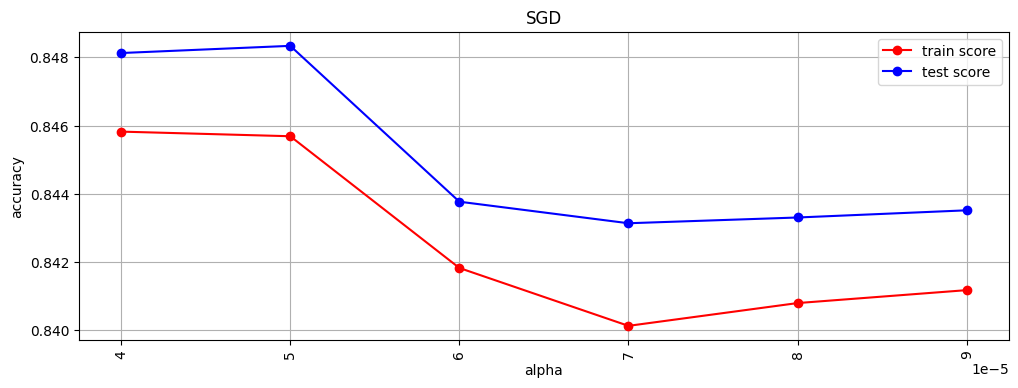

In [81]:
def evaluate_SGD(
    train_score=train_score, test_score=test_score, used_alphas=used_alphas
):
    plt.figure(figsize=(12, 4))

    plt.plot(used_alphas, train_score, color="red", marker="o", label="train score")
    plt.plot(used_alphas, test_score, color="blue", marker="o", label="test score")

    plt.xlabel("alpha")
    plt.ylabel("accuracy")
    plt.title("SGD")
    plt.grid(True)
    plt.xticks(used_alphas, rotation=90)
    plt.legend()
    plt.show()
    return


evaluate_SGD()

In [82]:
scaler = StandardScaler()
SGD = SGDClassifier(loss="log_loss", penalty="l1", alpha=5 * 1e-5, random_state=42)

pip = Pipeline(steps=[("SGDClassifier", SGD)])

pip.fit(x_train, y_train)

Pipeline(steps=[('SGDClassifier',
                 SGDClassifier(alpha=5e-05, loss='log_loss', penalty='l1',
                               random_state=42))])

In [83]:
train_acc = pip.score(x_train, y_train)
test_acc = pip.score(x_test, y_test)
train_acc, test_acc

(0.8456890331890332, 0.8483375420875421)

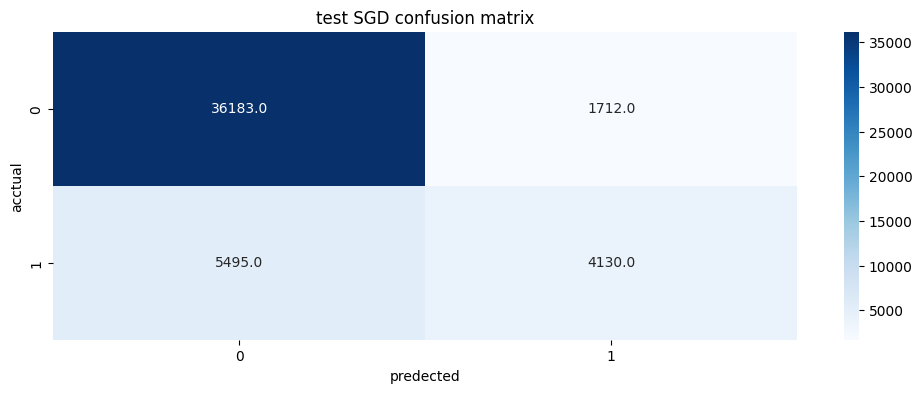

In [84]:
y_pred = pip.predict(x_test)

cm_SGD = confusion_matrix(y_true=y_test, y_pred=y_pred)

plt.figure(figsize=(12, 4))
sns.heatmap(cm_SGD, annot=True, cmap="Blues", fmt=".1f")
plt.title("test SGD confusion matrix")
plt.ylabel("acctual")
plt.xlabel("predected")
plt.show()

In [85]:
y_pred_train = SGD.predict(x_train)
y_pred__test = SGD.predict(x_test)

print("Classification Report - Train Data:")
print(classification_report(y_true=y_train, y_pred=y_pred_train))

print("Classification Report - Test Data:")
print(classification_report(y_true=y_test, y_pred=y_pred__test))

Classification Report - Train Data:
              precision    recall  f1-score   support

           0       0.86      0.95      0.91     88090
           1       0.71      0.42      0.53     22790

    accuracy                           0.85    110880
   macro avg       0.79      0.69      0.72    110880
weighted avg       0.83      0.85      0.83    110880

Classification Report - Test Data:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     37895
           1       0.71      0.43      0.53      9625

    accuracy                           0.85     47520
   macro avg       0.79      0.69      0.72     47520
weighted avg       0.84      0.85      0.83     47520



# [3.0 Decision-Trees (DTsC)](#3.0)


[3.1 Build DTsC Model](#3.1)


In [86]:
DTC = DecisionTreeClassifier(random_state=42)
DTC.fit(x_train, y_train)
DTC.score(x_train, y_train), DTC.score(x_test, y_test)

(0.9998286435786435, 0.8014520202020202)

[3.2 Evaluate DTsC Model](#3.2)


In [87]:
path = DTC.cost_complexity_pruning_path(x_train, y_train)
alphas = path.ccp_alphas
alphas = alphas[:-1]

used = []
models = []
for i in range(20):
    alpha = np.random.randint(len(alphas) - 1)
    used.append(alphas[alpha])
    DTC = DecisionTreeClassifier(random_state=42, ccp_alpha=alphas[alpha])
    DTC.fit(x_train, y_train)
    models.append(DTC)

In [88]:
train_score = [DTC_.score(x_train, y_train) for DTC_ in models]
test_score = [DTC_.score(x_test, y_test) for DTC_ in models]

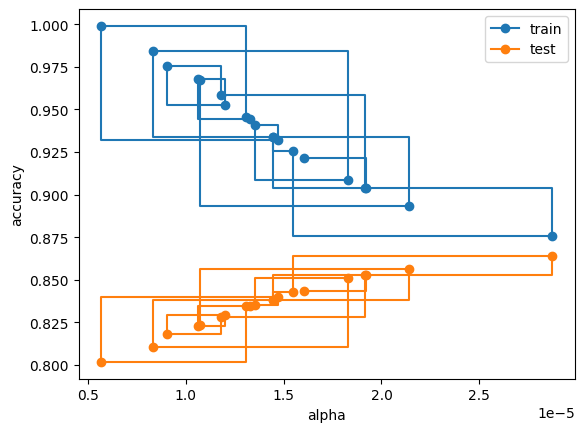

In [89]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.plot(used, train_score, marker="o", label="train", drawstyle="steps-post")
ax.plot(used, test_score, marker="o", label="test", drawstyle="steps-post")
plt.legend()
plt.show()

In [90]:
alphas[(alphas > 2.25 * 1e-5) & (alphas < 2.26 * 1e-5)]

array([2.25309322e-05, 2.25368767e-05, 2.25468975e-05, 2.25485733e-05,
       2.25727563e-05, 2.25864535e-05, 2.25970018e-05])

In [91]:
alpha = 2.25970018e-05

DTC = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
DTC.fit(x_train, y_train)
DTC.score(x_train, y_train), DTC.score(x_test, y_test)

(0.8886634199134199, 0.8590488215488216)

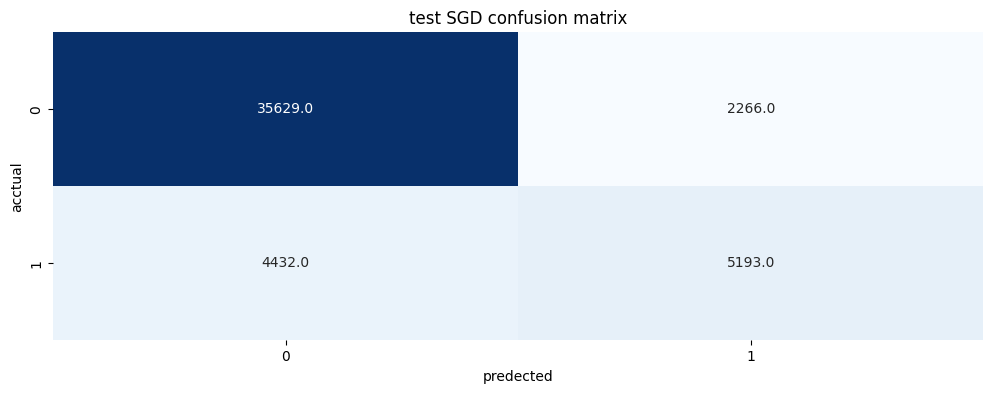

In [92]:
y_pred = DTC.predict(x_test)

cm_DTC = confusion_matrix(y_true=y_test, y_pred=y_pred)

plt.figure(figsize=(12, 4))
sns.heatmap(cm_DTC, annot=True, cmap="Blues", cbar=False, fmt=".1f")
plt.title("test SGD confusion matrix")
plt.ylabel("acctual")
plt.xlabel("predected")
plt.show()

In [93]:
y_pred_train = DTC.predict(x_train)
y_pred__test = DTC.predict(x_test)

print("Classification Report - Train Data:")
print(classification_report(y_true=y_train, y_pred=y_pred_train))

print("Classification Report - Test Data:")
print(classification_report(y_true=y_test, y_pred=y_pred__test))

Classification Report - Train Data:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93     88090
           1       0.80      0.61      0.69     22790

    accuracy                           0.89    110880
   macro avg       0.85      0.79      0.81    110880
weighted avg       0.88      0.89      0.88    110880

Classification Report - Test Data:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     37895
           1       0.70      0.54      0.61      9625

    accuracy                           0.86     47520
   macro avg       0.79      0.74      0.76     47520
weighted avg       0.85      0.86      0.85     47520



# [4.0 RandomForestClassifier (RFC)](#4.0)


[4.1 Build RFC Model](#4.1)


In [94]:
RF = RandomForestClassifier(criterion="entropy", n_estimators=300, random_state=42)
RF.fit(x_train, y_train)
print(RF.score(x_train, y_train)), print(RF.score(x_test, y_test))

0.9998286435786435
0.8637415824915825


(None, None)

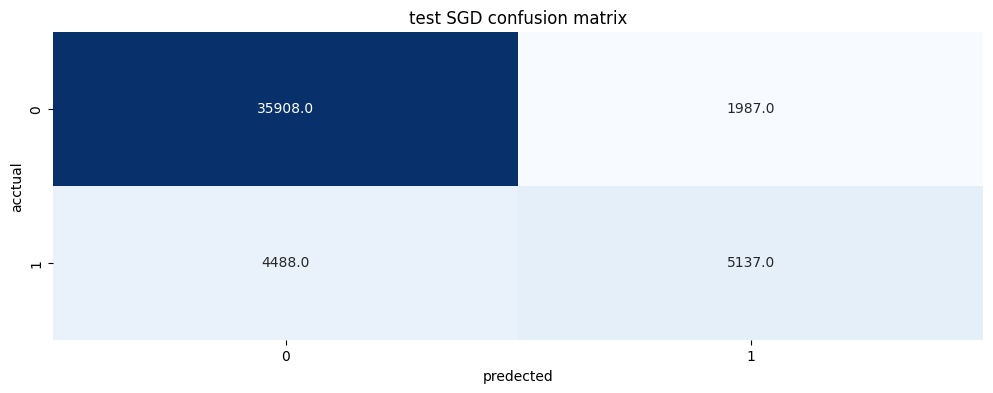

In [95]:
y_pred = RF.predict(x_test)

cm_RF = confusion_matrix(y_true=y_test, y_pred=y_pred)

plt.figure(figsize=(12, 4))
sns.heatmap(cm_RF, annot=True, cmap="Blues", cbar=False, fmt=".1f")
plt.title("test SGD confusion matrix")
plt.ylabel("acctual")
plt.xlabel("predected")
plt.show()

In [96]:
cat_boost = CatBoostClassifier(iterations=10000, random_state=42, verbose=0)

pip = Pipeline(steps=[("CatBoostClassifier", cat_boost)])

pip.fit(x_train, y_train)

Pipeline(steps=[('CatBoostClassifier',
                 <catboost.core.CatBoostClassifier object at 0x7f862c510160>)])

In [97]:
pip.score(x_train, y_train), pip.score(x_test, y_test)

(0.8847853535353535, 0.8686447811447812)

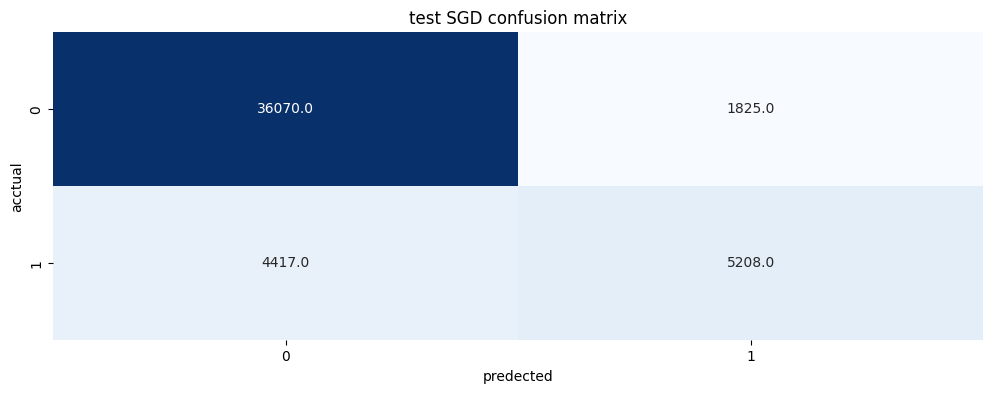

In [98]:
y_pred = pip.predict(x_test)

cm_cat_boost = confusion_matrix(y_true=y_test, y_pred=y_pred)

plt.figure(figsize=(12, 4))
sns.heatmap(cm_cat_boost, annot=True, cmap="Blues", cbar=False, fmt=".1f")
plt.title("test SGD confusion matrix")
plt.ylabel("acctual")
plt.xlabel("predected")
plt.show()

In [99]:
GBC = GradientBoostingClassifier(random_state=42)

GBC.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

In [100]:
GBC.score(x_train, y_train), GBC.score(x_test, y_test)

(0.8675685425685425, 0.8681607744107744)

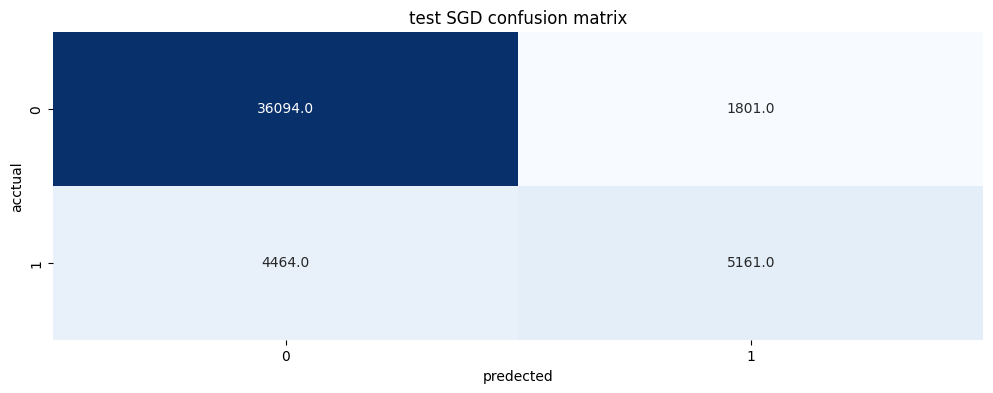

In [101]:
y_pred = GBC.predict(x_test)

cm_GBC = confusion_matrix(y_true=y_test, y_pred=y_pred)

plt.figure(figsize=(12, 4))
sns.heatmap(cm_GBC, annot=True, cmap="Blues", cbar=False, fmt=".1f")
plt.title("test SGD confusion matrix")
plt.ylabel("acctual")
plt.xlabel("predected")
plt.show()

In [102]:
XGBC = XGBClassifier(random_state=42)
XGBC.fit(x_train, y_train)
XGBC.score(x_train, y_train), XGBC.score(x_test, y_test)

(0.8858676046176046, 0.8665824915824916)

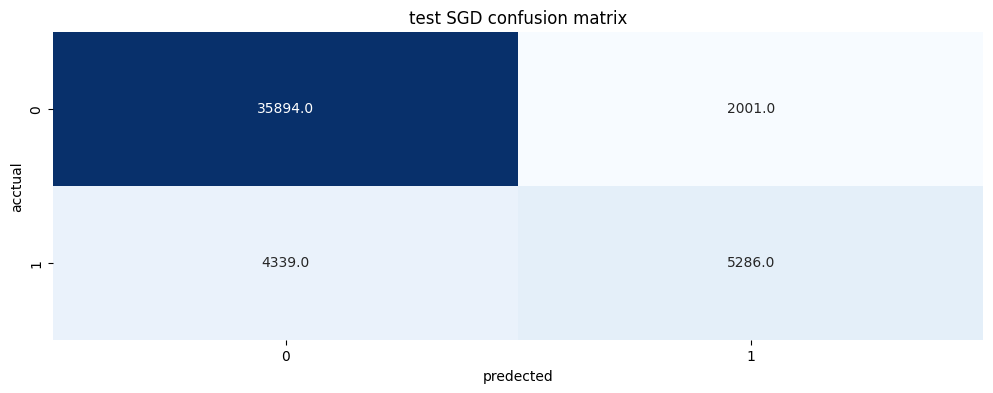

In [103]:
y_pred = XGBC.predict(x_test)

cm_XGBC = confusion_matrix(y_true=y_test, y_pred=y_pred)

plt.figure(figsize=(12, 4))
sns.heatmap(cm_XGBC, annot=True, cmap="Blues", cbar=False, fmt=".1f")
plt.title("test SGD confusion matrix")
plt.ylabel("acctual")
plt.xlabel("predected")
plt.show()

0.8798069985569985 0.8693181818181818


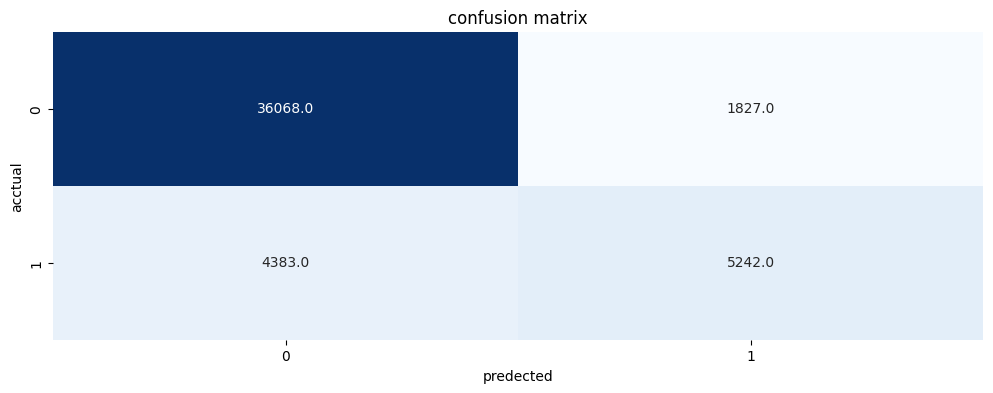

In [104]:
vot = VotingClassifier(
    estimators=[
        ("XGBC", XGBClassifier(random_state=42)),
        ("GBC", GradientBoostingClassifier(random_state=42)),
        (
            "Cat_boost",
            CatBoostClassifier(iterations=10000, random_state=42, verbose=0),
        ),
    ],
    voting="soft",
)

vot.fit(x_train, y_train)
print(vot.score(x_train, y_train), vot.score(x_test, y_test))

y_pred = vot.predict(x_test)

cm_vot = confusion_matrix(y_true=y_test, y_pred=y_pred)

plt.figure(figsize=(12, 4))
sns.heatmap(cm_vot, annot=True, cmap="Blues", cbar=False, fmt=".1f")
plt.title("confusion matrix")
plt.ylabel("acctual")
plt.xlabel("predected")
plt.show()

In [105]:
test = bank_df_test
prediction = vot.predict_proba(test)
prediction = prediction[:, 1]

Exited = prediction
submmit = pd.DataFrame({"id": ids, "Exited": Exited})
submmit.to_csv(
    "/home/ahmed/Ai/Kaggle-Competitions-Notebooks/Binary Classification with a Bank Churn Dataset/dataset/submission.csv",
    index=False,
)